In [62]:
import numpy as np
import pywt
import pywt.data
import matplotlib.pyplot as plt
import os

def load_y_data(y_path):
    y = np.loadtxt(y_path, dtype=np.int32).reshape(-1,1)
    # change labels range from 1-6 t 0-5, this enables a sparse_categorical_crossentropy loss function
    return y - 1

def load_X_data(X_path):
    X_signal_paths = [X_path + file for file in os.listdir(X_path)]
    X_signals = [np.loadtxt(path, dtype=np.float32) for path in X_signal_paths]
    return np.transpose(np.array(X_signals), (1, 2, 0))

direc ="C:/Users/mator/Desktop/Programming/BDA-2ndSemester/3rd-semester/Monographic Lecture In Mathematics/Problem 2"

file_x_train = "/train/Inertial Signals/"
file_y_train = "/train/y_train.txt"
file_x_test = "/Test/Inertial Signals/"
file_y_test = "/Test/y_test.txt"

x_train = load_X_data(direc+file_x_train)
x_test = load_X_data(direc+file_x_test)
y_train = load_y_data(direc+file_y_train)
y_test = load_y_data(direc+file_y_test)

LABEL_NAMES = ["Walking", "Walking upstairs", "Walking downstairs", "Sitting", "Standing", "Laying"]



In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7352, 128, 9)
(7352, 1)
(2947, 128, 9)
(2947, 1)


In [78]:
def create_cwt_images(X, n_scales, wavelet_name = "morl"):
    n_samples = X.shape[0]
    n_signals = X.shape[2]
    
    scales = np.arange(1,n_scales+1)
    
    X_cwt = np.ndarray(shape=(n_samples, n_scales, n_scales, n_signals), dtype = "float32")
    for sample in range(n_samples):
        if sample%100 == 0:
            print(sample)
        for signal in range(n_signals):
            serie=X[sample, :, signal]
            coeffs,freqs = pywt.cwt(serie,scales,wavelet_name)
            X_cwt[sample, :, :, signal]=coeffs
            
    return X_cwt
   
n_scales=128

X_test_cwt = create_cwt_images(x_test, n_scales)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [80]:
np.save(direc + "/x_test_cwt", X_test_cwt)


In [45]:
def plot_cwt_coeffs_per_label(X, label_indicies, label_names, signal, sample, scales, wavelet):
    
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,5))
    
    for ax, indices, name in zip(axs.flat, label_indicies, label_names):
        # apply  PyWavelets continuous wavelet transfromation function
        coeffs, freqs = pywt.cwt(X[indices[sample],:, signal], scales, wavelet = wavelet)
        # create scalogram
        ax.imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
        ax.set_title(name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time')
    plt.tight_layout()
    
    
def split_indices_per_label(y):
    indicies_per_label = [[] for x in range(0,6)]
    # loop over the six labels
    for i in range(6): 
        indicies_per_label[i] = np.where(y == i)[0]
    return indicies_per_label

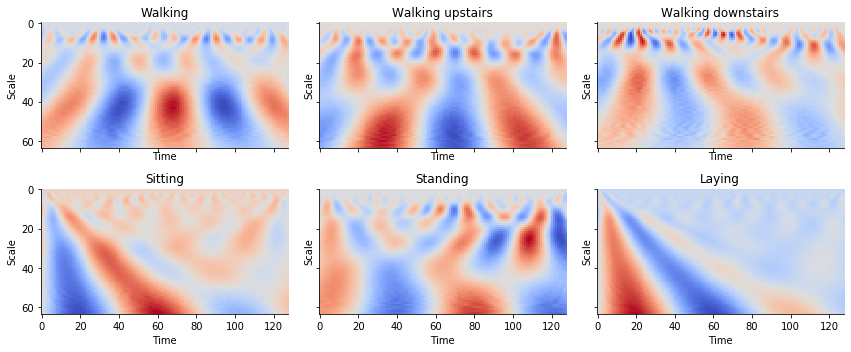

In [50]:
train_labels_indicies = split_indices_per_label(y_train)

signal = 3 # signal index
sample = 1 # sample index of each label indicies list
scales = np.arange(1, 128) # range of scales
wavelet = 'morl' # mother wavelet

plot_cwt_coeffs_per_label(x_train, train_labels_indicies, LABEL_NAMES, signal, sample, scales, wavelet)
    